In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import json
%matplotlib inline


In [2]:
df1 = pd.read_csv('data/rent_apts.csv')
df1.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [3]:
df1.describe()

,sq_mtrs,Bedrooms,Bathrooms
count,1846.000000,1845.000000,1557.000000
mean,327.226977,2.577778,2.595376
std,2048.784581,0.819399,1.000349
min,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,2.000000
75%,4.000000,3.000000,3.000000
max,40470.000000,6.000000,6.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


In [5]:
df1.Agency.unique().count

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [7]:
df1.groupby('Neighborhood')['Neighborhood'].agg('count')

Neighborhood
, Dennis Pritt, Kilimani, Dagoretti North            1
01, Marula Lane, Kilimani, Dagoretti North           1
04, kilimani, Kilimani, Dagoretti North              1
1 Kilimani, Kilimani, Dagoretti North                1
1 Ojijo, Parklands, Westlands                        1
                                                    ..
walk to valley arcade, Lavington, Dagoretti North    1
wambugu road, 1st parkland, Parklands, Westlands     1
westlands Avenue , Westlands Area, Westlands         1
westlands, Westlands Area, Westlands                 2
westlands, Westlands, Riverside, Westlands           1
Name: Neighborhood, Length: 647, dtype: int64

In [ ]:
df1['Agency'].value_counts()

In [8]:
df1[(df1['Agency'].value_counts()  <= 1)]

C:\Users\user\AppData\Local\Temp\ipykernel_16288\196160112.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[(df1['Agency'].value_counts()  <= 1)]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
df1['Agency'].unique()

In [9]:
df1['Agency'].describe()


count                       1848
unique                       194
top       Prudential Green Ville
freq                          98
Name: Agency, dtype: object

In [ ]:
df1.isnull().sum()

In [ ]:
df1.shape


In [10]:
df1['Agency'].info

<bound method Series.info of 0             Buy Rent Shelters
1           Kenya Classic Homes
2        Absolute Estate Agents
3         A1 Properties Limited
4           Pmc Estates Limited
                 ...           
1843         Avic International
1844              Dmus Realtors
1845      A1 Properties Limited
1846    Geoscape Global Limited
1847        Pmc Estates Limited
Name: Agency, Length: 1848, dtype: object>

In [ ]:
df1


In [12]:
df2 = df1.drop(['link'],axis='columns')
df2.shape

(1848, 6)

In [13]:
df2.head()

,Agency,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",3.0,3.0,NaN


In [14]:
df2.isnull().sum()

Agency            0
Neighborhood      0
Price             0
sq_mtrs           2
Bedrooms          3
Bathrooms       291
dtype: int64

In [15]:
df2.Bathrooms.isnull().value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4        True
        ...  
1843     True
1844    False
1845    False
1846    False
1847     True
Name: Bathrooms, Length: 1848, dtype: bool>

### Data Cleaning: Handle NA values

In [16]:
df2[(df2.Bathrooms.isnull())]

,Agency,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",3.0,3.0,NaN
5,Lizmor Properties,"Waiyaki Way, Westlands","KSh 150,000",2.0,2.0,NaN
8,Pmc Estates Limited,"Thika Road, Thika Road","KSh 85,000",4.0,4.0,NaN
19,Real Management Services 2002Limited,"Sports Road, Waiyaki Way, Westlands","KSh 13,000",0.0,0.0,NaN
36,Cfs Homes,"Ruaka, Kiambaa","KSh 16,000",1.0,1.0,NaN
...,...,...,...,...,...,...
1817,Capstone Properties,"General Mathenge, Westlands","KSh 175,000",3.0,3.0,NaN
1820,Cloud Real Estate,"General Mathenge, Westlands","KSh 175,000",4.0,4.0,NaN
1833,Rainbow Properties Limited,"State House, Dagoretti North","KSh 180,000",3.0,3.0,NaN
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North","KSh 180,000",3.0,3.0,NaN


In [17]:
def fill_nan_bath(row):
    if pd.isna(row['Bathrooms']):
        if row['Bedrooms'] > 0:
            row['Bathrooms'] = row['Bedrooms']
    return row

df3 = df2.apply(fill_nan_bath, axis=1)
df3.sq_mtrs.isnull().sum()

np.int64(2)

In [18]:
df3.sq_mtrs.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1843    False
1844    False
1845    False
1846    False
1847    False
Name: sq_mtrs, Length: 1848, dtype: bool

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

In [ ]:
df3.head()

In [19]:
def convert_price_to_num(x):
    tokens = x.split(' ')
    return tokens[1]

df3["Price"] = df3['Price'].apply(convert_price_to_num)
df3
    

,Agency,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","155,000",4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","100,000",300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","75,000",3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","135,000",227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","50,000",3.0,3.0,3.0
...,...,...,...,...,...,...
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North","180,000",3.0,3.0,3.0
1844,Dmus Realtors,"Peponi road, Spring Valley, Westlands","180,000",2.0,2.0,2.0
1845,A1 Properties Limited,"Kileleshwa, Dagoretti North","180,000",4.0,4.0,5.0
1846,Geoscape Global Limited,"Westlands Area, Westlands","180,000",4.0,4.0,4.0


In [20]:
df1.shape[0] - df2.shape[0]

0

###  Feature Engineering

In [21]:
def remove_comma(x):
    return int(x.replace(",", ""))
df3['Price'] = df3['Price'].apply(remove_comma)
df4 = df3.copy()
df4['price_per_sq_mtrs'] = df3['Price']/df3['sq_mtrs']
df4.head()


,Agency,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,price_per_sq_mtrs
0,Buy Rent Shelters,"General Mathenge, Westlands",155000,4.0,4.0,4.0,38750.000000
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000,300.0,3.0,4.0,333.333333
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000,3.0,3.0,5.0,25000.000000
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000,227.0,3.0,4.0,594.713656
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000,3.0,3.0,3.0,16666.666667


In [22]:
location_stats = df4['Neighborhood'].value_counts(ascending=False)
location_stats



Neighborhood
Kilimani, Dagoretti North                                    168
Kileleshwa, Dagoretti North                                  108
Westlands Area, Westlands                                    105
Lavington, Dagoretti North                                    90
Riverside, Westlands                                          54
                                                            ... 
Signature Residence Nairobi, Kileleshwa, Dagoretti North       1
01, Marula Lane, Kilimani, Dagoretti North                     1
General Mathenge Drive, Spring Valley, Westlands               1
Mpaka Road, Westlands, Nairobi, Westlands Area, Westlands      1
Lower kabete, Kabete Lane, Spring Valley, Westlands            1
Name: count, Length: 647, dtype: int64

In [23]:
len(location_stats[location_stats<2
    ])

471

In [24]:
df4

,Agency,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,price_per_sq_mtrs
0,Buy Rent Shelters,"General Mathenge, Westlands",155000,4.0,4.0,4.0,38750.000000
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000,300.0,3.0,4.0,333.333333
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000,3.0,3.0,5.0,25000.000000
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000,227.0,3.0,4.0,594.713656
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000,3.0,3.0,3.0,16666.666667
...,...,...,...,...,...,...,...
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North",180000,3.0,3.0,3.0,60000.000000
1844,Dmus Realtors,"Peponi road, Spring Valley, Westlands",180000,2.0,2.0,2.0,90000.000000
1845,A1 Properties Limited,"Kileleshwa, Dagoretti North",180000,4.0,4.0,5.0,45000.000000
1846,Geoscape Global Limited,"Westlands Area, Westlands",180000,4.0,4.0,4.0,45000.000000


In [25]:
df4


,Agency,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,price_per_sq_mtrs
0,Buy Rent Shelters,"General Mathenge, Westlands",155000,4.0,4.0,4.0,38750.000000
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000,300.0,3.0,4.0,333.333333
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000,3.0,3.0,5.0,25000.000000
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000,227.0,3.0,4.0,594.713656
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000,3.0,3.0,3.0,16666.666667
...,...,...,...,...,...,...,...
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North",180000,3.0,3.0,3.0,60000.000000
1844,Dmus Realtors,"Peponi road, Spring Valley, Westlands",180000,2.0,2.0,2.0,90000.000000
1845,A1 Properties Limited,"Kileleshwa, Dagoretti North",180000,4.0,4.0,5.0,45000.000000
1846,Geoscape Global Limited,"Westlands Area, Westlands",180000,4.0,4.0,4.0,45000.000000


### Outlier Removal Using Bathrooms Feature


In [36]:
len(location_stats[location_stats ==5])

9

In [30]:
df4.head()

,Agency,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,price_per_sq_mtrs
0,Buy Rent Shelters,"General Mathenge, Westlands",155000,4.0,4.0,4.0,38750.000000
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000,300.0,3.0,4.0,333.333333
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000,3.0,3.0,5.0,25000.000000
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000,227.0,3.0,4.0,594.713656
4,Pmc Estates Limited,"Imara Daima, Embakasi",50000,3.0,3.0,3.0,16666.666667


In [33]:
df4.Agency.sum()

'Buy Rent SheltersKenya Classic HomesAbsolute Estate AgentsA1 Properties LimitedPmc Estates LimitedLizmor PropertiesMambo Properties EnterpriseWealthlink Realtors LtdPmc Estates LimitedNaftal PropertiesDakima Home InternationalOpus PropertiesRealty PlusPam Golding PropertiesYellow MarketHyra Real Estate LtdDunhill Consulting LimitedGreen Knight PropertiesKitheka MusyokaReal Management Services 2002LimitedEstate Masters LimitedHomekenya24Kitheka MusyokaEstate Masters LimitedEstate Masters LimitedHabitat Realtors International LtdRoyani Properties LimitedUnique Casles Management LtdEstate Masters LimitedWainaina Real Estate AgentsHavilaplus Estates LtdNgong Hills AgencyEstate Masters LimitedChelezo ResidencyOrigin HomesOpus PropertiesCfs HomesPmc Estates LimitedCanaan PropertiesEstate Masters LimitedEstate Masters LimitedHavilaplus Estates LtdUnique Casles Management LtdEstate Masters LimitedKitheka MusyokaHavilaplus Estates LtdKimachas EnterprisesThe Epic PropertiesWestside Real EstateW

In [35]:
df4.duplicated().sum()

np.int64(138)

Text(0, 0.5, 'Count')

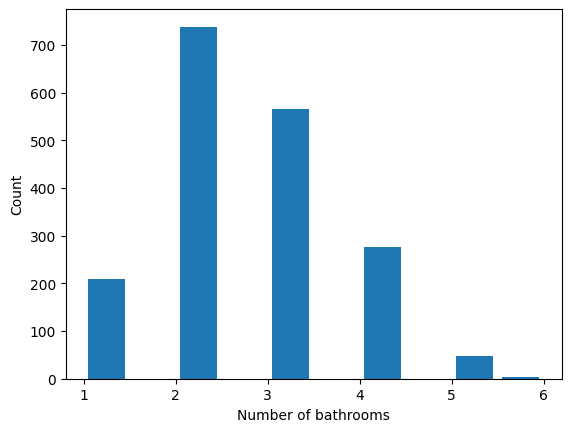

In [37]:
plt.hist(df4.Bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [40]:
df5 = df4[df4.Bathrooms < 6]
df5.shape

(1838, 7)

Text(0, 0.5, 'Count')

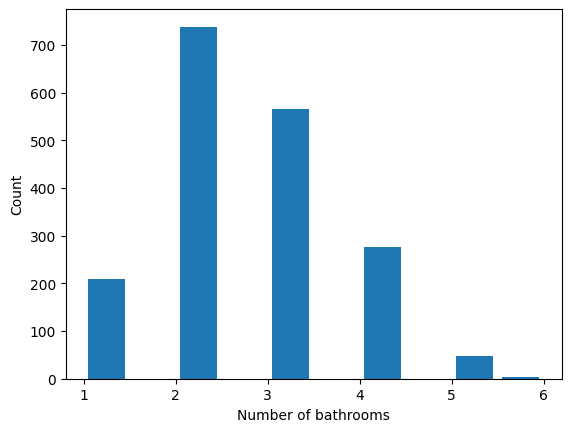

In [41]:
plt.hist(df4.Bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Neighborhood'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape